In [1]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from matplotlib.pyplot import *
%matplotlib inline

In [2]:
autos = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                    header=None,names=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors',
                                      'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                                      'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                                      'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price'])
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
autos.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
corr_autos=autos.corr()
print(corr_autos)

                   symboling  wheel-base    length     width    height  \
symboling           1.000000   -0.531954 -0.357612 -0.232919 -0.541038   
wheel-base         -0.531954    1.000000  0.874587  0.795144  0.589435   
length             -0.357612    0.874587  1.000000  0.841118  0.491029   
width              -0.232919    0.795144  0.841118  1.000000  0.279210   
height             -0.541038    0.589435  0.491029  0.279210  1.000000   
curb-weight        -0.227691    0.776386  0.877728  0.867032  0.295572   
engine-size        -0.105790    0.569329  0.683360  0.735433  0.067149   
compression-ratio  -0.178515    0.249786  0.158414  0.181129  0.261214   
city-mpg           -0.035823   -0.470414 -0.670909 -0.642704 -0.048640   
highway-mpg         0.034606   -0.544082 -0.704662 -0.677218 -0.107358   

                   curb-weight  engine-size  compression-ratio  city-mpg  \
symboling            -0.227691    -0.105790          -0.178515 -0.035823   
wheel-base            0.776386   

In [6]:
#autos['price'] = 
price = autos['price']
autos["price"] = autos["price"].mask(autos["price"] == '?', np.nan)
median_price = price.median()
#autos['price'].replace(np.nan, median_price)
#autos['price']
autos["horsepower"] = autos["horsepower"].mask(autos["horsepower"] == '?', np.nan)
autos['horsepower'] = autos['horsepower'].fillna((autos['horsepower'].median()))
autos['horsepower']

#autos["price"] = autos["price"].mask(autos["price"] == '?', np.nan)
#autos['price'] = autos['price'].fillna((autos['price'].median()))
#autos['price']
#price = autos['price']
#price.replace('?', np.nan)
#median_price = price.median()
#median_price

autos

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,NaN


In [15]:
#autos['horsepower'].corr(autos['price'])
pd.to_numeric(autos['horsepower'], errors='coerce')
pd.to_numeric(autos['price'], errors='coerce')
autos
type(autos['horsepower'])

pandas.core.series.Series

In [25]:
autos["price"] = autos["price"].mask(autos["price"] == '?', np.nan)
autos['price'] = autos['price'].fillna((autos['price'].median()))
pd.to_numeric(autos['price'], errors='coerce')
fin_autos = autos
from matplotlib.pyplot import *
%matplotlib inline
fin_autos.plot.scatter(x='width',y='price')

ValueError: scatter requires y column to be numeric

In [28]:
autos['horsepower'].dtype

dtype('O')

In [37]:
autos['horsepower'] = autos['horsepower'].astype(str).astype(float)
autos['horsepower'].dtype

dtype('float64')

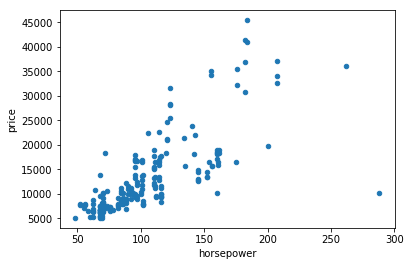

In [39]:
autos['price'] = autos['price'].astype(str).astype(float)
autos['price'].dtype
autos.plot.scatter(x='horsepower',y='price')